# Random Forest Classifier

## Holiday Package Prediciton

### 1) Problem statement.
"Trips & Travel.Com" company wants to enable and establish a viable business model to expand the customer base.
One of the ways to expand the customer base is to introduce a new offering of packages. Currently, there are 5 types of packages the company is offering * Basic, Standard, Deluxe, Super Deluxe, King. Looking at the data of the last year, we observed that 18% of the customers purchased the packages. However, the marketing cost was quite high because customers were contacted at random without looking at the available information.
The company is now planning to launch a new product i.e. Wellness Tourism Package. Wellness Tourism is defined as Travel that allows the traveler to maintain, enhance or kick-start a healthy lifestyle, and support or increase one's sense of well-being.
However, this time company wants to harness the available data of existing and potential customers to make the marketing expenditure more efficient.
### 2) Data Collection.
The Dataset is collected from https://www.kaggle.com/datasets/susant4learning/holiday-package-purchase-prediction
The data consists of 20 column and 4888 rows.

In [2]:
## importing important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings

warnings.filterwarnings("ignore")

%matplotlib inline

In [3]:
df = pd.read_csv("../data/Travel.csv")
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


### 3) Data Cleaning
#### Handling Missing values
1. Handling Missing values
2. Handling Duplicates
3. Check data type
4. Understand the dataset

In [4]:
df.isnull().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

In [5]:
df['Gender'].value_counts()

Gender
Male       2916
Female     1817
Fe Male     155
Name: count, dtype: int64

In [6]:
df['MaritalStatus'].value_counts()

MaritalStatus
Married      2340
Divorced      950
Single        916
Unmarried     682
Name: count, dtype: int64

In [7]:
df['TypeofContact'].value_counts()

TypeofContact
Self Enquiry       3444
Company Invited    1419
Name: count, dtype: int64

In [8]:
df['Gender'] = df['Gender'].replace('Fe Male' , 'Female')
df['MaritalStatus'] = df['MaritalStatus'].replace('Single' , 'Unmarried')

In [9]:
df['Gender'].value_counts()

Gender
Male      2916
Female    1972
Name: count, dtype: int64

In [10]:
df['MaritalStatus'].value_counts()

MaritalStatus
Married      2340
Unmarried    1598
Divorced      950
Name: count, dtype: int64

In [11]:
features_na = [features for features in df.columns if df[features].isnull().sum() >= 1]

for feature in features_na:
    print(feature, np.round(df[feature].isnull().mean() * 100, 5) , '% missing values')

Age 4.62357 % missing values
TypeofContact 0.51146 % missing values
DurationOfPitch 5.13502 % missing values
NumberOfFollowups 0.92062 % missing values
PreferredPropertyStar 0.53191 % missing values
NumberOfTrips 2.86416 % missing values
NumberOfChildrenVisiting 1.35025 % missing values
MonthlyIncome 4.76678 % missing values


In [12]:
df[features_na].select_dtypes(exclude='object').describe()

,Age,DurationOfPitch,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,NumberOfChildrenVisiting,MonthlyIncome
count,4662.000000,4637.000000,4843.000000,4862.000000,4748.000000,4822.000000,4655.000000
mean,37.622265,15.490835,3.708445,3.581037,3.236521,1.187267,23619.853491
std,9.316387,8.519643,1.002509,0.798009,1.849019,0.857861,5380.698361
min,18.000000,5.000000,1.000000,3.000000,1.000000,0.000000,1000.000000
25%,31.000000,9.000000,3.000000,3.000000,2.000000,1.000000,20346.000000
50%,36.000000,13.000000,4.000000,3.000000,3.000000,1.000000,22347.000000
75%,44.000000,20.000000,4.000000,4.000000,4.000000,2.000000,25571.000000
max,61.000000,127.000000,6.000000,5.000000,22.000000,3.000000,98678.000000


#### Imputing Null values
1. Impute Median value for Age column
2. Impute Mode for Type of Contract
3. Impute Median for Duration of Pitch
4. Impute Mode for NumberofFollowup as it is Discrete feature
5. Impute Mode for PreferredPropertyStar
6. Impute Median for NumberofTrips
7. Impute Mode for NumberOfChildrenVisiting
8. Impute Median for MonthlyIncome

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

In [14]:
df.Age.fillna(df.Age.median() , inplace= True)

df.TypeofContact.fillna(df.TypeofContact.mode()[0] , inplace= True)

df.DurationOfPitch.fillna(df.DurationOfPitch.median() , inplace= True)

df.NumberOfFollowups.fillna(df.NumberOfFollowups.mode()[0] , inplace= True)

df.PreferredPropertyStar.fillna(df.PreferredPropertyStar.mode()[0] , inplace= True)

df.NumberOfTrips.fillna(df.NumberOfTrips.median() , inplace= True)

df.NumberOfChildrenVisiting.fillna(df.NumberOfChildrenVisiting.mode()[0] , inplace= True)

df.MonthlyIncome.fillna(df.MonthlyIncome.median() , inplace= True)

In [15]:
df.isnull().sum()

CustomerID                  0
ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

In [16]:
df.drop('CustomerID' , axis = 1 , inplace= True)

## 4) Feature Engineering

### Feature Extraction

In [17]:
df['TotalVisiting'] = df['NumberOfPersonVisiting'] + df['NumberOfChildrenVisiting']
df.drop(['NumberOfPersonVisiting' , 'NumberOfChildrenVisiting'] , axis = 1 , inplace= True)

In [18]:
## get all the numeric features
num_features = [feature for feature in df.columns if df[feature].dtype != 'O']
print('Num of Numerical Features :', len(num_features))

Num of Numerical Features : 12


In [19]:
##categorical features
cat_features = [feature for feature in df.columns if df[feature].dtype == 'O']
print('Num of Categorical Features :', len(cat_features))

Num of Categorical Features : 6


In [20]:
## Discrete features
discrete_features=[feature for feature in num_features if len(df[feature].unique())<=25]
print('Num of Discrete Features :',len(discrete_features))

Num of Discrete Features : 9


In [21]:
## coontinuous features
continuous_features=[feature for feature in num_features if feature not in discrete_features]
print('Num of Continuous Features :',len(continuous_features))

Num of Continuous Features : 3


## 5) Train Test Split And Model Training

In [22]:
from sklearn.model_selection import train_test_split
X = df.drop(['ProdTaken'], axis=1)
y = df['ProdTaken']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X,y , test_size= 0.2, random_state=11)

In [24]:
X_train.shape , y_train.shape

((3910, 17), (3910,))

In [25]:
# Create Column Transformer with 3 types of transformers
cat_features = X.select_dtypes(include="object").columns
num_features = X.select_dtypes(exclude="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder(drop='first')

preprocessor = ColumnTransformer(
    [
         ("OneHotEncoder", oh_transformer, cat_features),
          ("StandardScaler", numeric_transformer, num_features)
    ]
)

In [26]:
preprocessor

ColumnTransformer(transformers=[('OneHotEncoder', OneHotEncoder(drop='first'),
                                 Index(['TypeofContact', 'Occupation', 'Gender', 'ProductPitched',
       'MaritalStatus', 'Designation'],
      dtype='object')),
                                ('StandardScaler', StandardScaler(),
                                 Index(['Age', 'CityTier', 'DurationOfPitch', 'NumberOfFollowups',
       'PreferredPropertyStar', 'NumberOfTrips', 'Passport',
       'PitchSatisfactionScore', 'OwnCar', 'MonthlyIncome', 'TotalVisiting'],
      dtype='object'))])

In [27]:
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [28]:
X_train

array([[ 1.        ,  1.        ,  0.        , ...,  0.7782991 ,
        -1.20088692,  0.64150463],
       [ 1.        ,  0.        ,  1.        , ..., -1.28485309,
        -0.54557104,  2.04552539],
       [ 1.        ,  0.        ,  0.        , ...,  0.7782991 ,
         0.33773896,  0.64150463],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  0.7782991 ,
        -0.3963142 ,  0.64150463],
       [ 1.        ,  0.        ,  1.        , ...,  0.7782991 ,
         2.81318562,  1.34351501],
       [ 1.        ,  0.        ,  0.        , ..., -1.28485309,
        -0.44925164, -0.76251613]], shape=(3910, 26))

## 6) Model Training

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import *

In [30]:
models={
    "Logisitic Regression":LogisticRegression(),
    "Decision Tree":DecisionTreeClassifier(),
    "Random Forest":RandomForestClassifier(),
    "Gradient Boost":GradientBoostingClassifier()
}
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Training set performance
    model_train_accuracy = accuracy_score(y_train, y_train_pred) # Calculate Accuracy
    model_train_f1 = f1_score(y_train, y_train_pred, average='weighted') # Calculate F1-score
    model_train_precision = precision_score(y_train, y_train_pred) # Calculate Precision
    model_train_recall = recall_score(y_train, y_train_pred) # Calculate Recall
    model_train_rocauc_score = roc_auc_score(y_train, y_train_pred)


    # Test set performance
    model_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
    model_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score
    model_test_precision = precision_score(y_test, y_test_pred) # Calculate Precision
    model_test_recall = recall_score(y_test, y_test_pred) # Calculate Recall
    model_test_rocauc_score = roc_auc_score(y_test, y_test_pred) #Calculate Roc


    print(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print('- F1 score: {:.4f}'.format(model_train_f1))
    
    print('- Precision: {:.4f}'.format(model_train_precision))
    print('- Recall: {:.4f}'.format(model_train_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))

    
    
    print('----------------------------------')
    
    print('Model performance for Test set')
    print('- Accuracy: {:.4f}'.format(model_test_accuracy))
    print('- F1 score: {:.4f}'.format(model_test_f1))
    print('- Precision: {:.4f}'.format(model_test_precision))
    print('- Recall: {:.4f}'.format(model_test_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))

    
    print('='*35)
    print('\n')

Logisitic Regression
Model performance for Training set
- Accuracy: 0.8407
- F1 score: 0.8152
- Precision: 0.6914
- Recall: 0.3098
- Roc Auc Score: 0.6385
----------------------------------
Model performance for Test set
- Accuracy: 0.8661
- F1 score: 0.8419
- Precision: 0.7681
- Recall: 0.3155
- Roc Auc Score: 0.6479


Decision Tree
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9182
- F1 score: 0.9189
- Precision: 0.7500
- Recall: 0.7857
- Roc Auc Score: 0.8657


Random Forest
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9407
- F1 score: 0.9366
- Precision: 0.9583
- Recall: 0.6845
- Roc Auc Score: 0.8392


Gradient Boost
Model performance for Training se

### Hyperparamter Tuning for Random Forest Classsifier

In [31]:
rf_params = {"max_depth": [5, 8, 15, None, 10],
             "max_features": [5, 7, "auto", 8],
             "min_samples_split": [2, 8, 15, 20],
             "n_estimators": [100, 200, 500, 1000]}

In [32]:
from sklearn.model_selection import RandomizedSearchCV

In [33]:
# Models list for Hyperparameter tuning
randomcv_models = [
                   ("RF", RandomForestClassifier(), rf_params)
                   
                   ]

In [34]:
randomcv_models

[('RF',
  RandomForestClassifier(),
  {'max_depth': [5, 8, 15, None, 10],
   'max_features': [5, 7, 'auto', 8],
   'min_samples_split': [2, 8, 15, 20],
   'n_estimators': [100, 200, 500, 1000]})]

In [35]:
model_param = {}
for name, model, params in randomcv_models:
    random = RandomizedSearchCV(estimator=model,
                                   param_distributions=params,
                                   n_iter=100,
                                   cv=3,
                                   verbose=2,
                                   n_jobs=-1)
    random.fit(X_train, y_train)
    model_param[name] = random.best_params_

for model_name in model_param:
    print(f"---------------- Best Params for {model_name} -------------------")
    print(model_param[model_name])

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END max_depth=None, max_features=auto, min_samples_split=8, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_split=8, n_estimators=100; total time=   0.0s
[CV] END max_depth=15, max_features=auto, min_samples_split=20, n_estimators=500; total time=   0.0s
[CV] END max_depth=15, max_features=auto, min_samples_split=20, n_estimators=500; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_split=8, n_estimators=100; total time=   0.0s
[CV] END max_depth=15, max_features=auto, min_samples_split=20, n_estimators=500; total time=   0.0s
[CV] END max_depth=5, max_features=8, min_samples_split=15, n_estimators=100; total time=   0.2s
[CV] END max_depth=5, max_features=8, min_samples_split=15, n_estimators=100; total time=   0.2s
[CV] END max_depth=5, max_features=8, min_samples_split=15, n_estimators=100; total time=   0.2s
[CV] END max_depth=8, max_features=5,

In [36]:
models={
    
    "Random Forest":RandomForestClassifier(n_estimators=100,min_samples_split=2,
                                          max_features=8,max_depth=None)
}
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Training set performance
    model_train_accuracy = accuracy_score(y_train, y_train_pred) # Calculate Accuracy
    model_train_f1 = f1_score(y_train, y_train_pred, average='weighted') # Calculate F1-score
    model_train_precision = precision_score(y_train, y_train_pred) # Calculate Precision
    model_train_recall = recall_score(y_train, y_train_pred) # Calculate Recall
    model_train_rocauc_score = roc_auc_score(y_train, y_train_pred)


    # Test set performance
    model_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
    model_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score
    model_test_precision = precision_score(y_test, y_test_pred) # Calculate Precision
    model_test_recall = recall_score(y_test, y_test_pred) # Calculate Recall
    model_test_rocauc_score = roc_auc_score(y_test, y_test_pred) #Calculate Roc


    print(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print('- F1 score: {:.4f}'.format(model_train_f1))
    
    print('- Precision: {:.4f}'.format(model_train_precision))
    print('- Recall: {:.4f}'.format(model_train_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))

    
    
    print('----------------------------------')
    
    print('Model performance for Test set')
    print('- Accuracy: {:.4f}'.format(model_test_accuracy))
    print('- F1 score: {:.4f}'.format(model_test_f1))
    print('- Precision: {:.4f}'.format(model_test_precision))
    print('- Recall: {:.4f}'.format(model_test_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))

    
    print('='*35)
    print('\n')

Random Forest
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9468
- F1 score: 0.9433
- Precision: 0.9754
- Recall: 0.7083
- Roc Auc Score: 0.8523




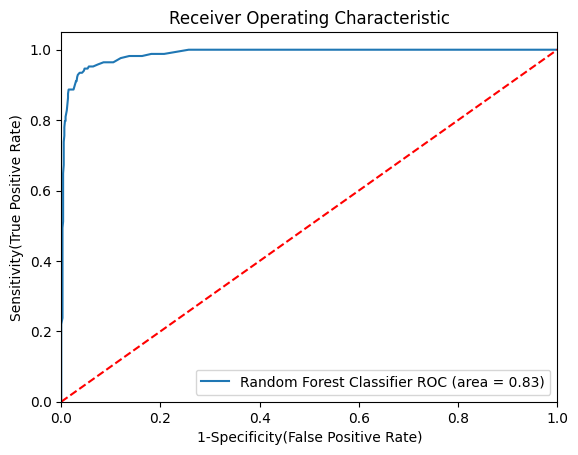

In [37]:
## Plot ROC AUC Curve
from sklearn.metrics import roc_auc_score,roc_curve
plt.figure()

# Add the models to the list that you want to view on the ROC plot
auc_models = [
{
    'label': 'Random Forest Classifier',
    'model': RandomForestClassifier(n_estimators=100,min_samples_split=2,
                                          max_features=8,max_depth=None),
    'auc':  0.8325
},
    
]
# create loop through all model
for algo in auc_models:
    model = algo['model'] # select the model
    model.fit(X_train, y_train) # train the model
# Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
# Calculate Area under the curve to display on the plot
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (algo['label'], algo['auc']))
# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig("auc.png")
plt.show() 

# Random Forest Regressor

## Used Car Price Prediction

### 1) Problem statement.

* This dataset comprises used cars sold on cardehko.com in India as well as important features of these cars.
* If user can predict the price of the car based on input features.
* Prediction results can be used to give new seller the price suggestion based on market condition.

### 2) Data Collection.
* The Dataset is collected from scrapping from cardheko webiste
* The data consists of 13 column and 15411 rows.

In [38]:
df = pd.read_csv(r"../data/cardekho_imputated.csv", index_col=[0])

In [39]:
df.head()

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


### 3) Data Cleaning
* Handling Missing values 
* Handling Duplicates
* Check data type
* Understand the dataset

In [40]:
df.isnull().sum()

car_name             0
brand                0
model                0
vehicle_age          0
km_driven            0
seller_type          0
fuel_type            0
transmission_type    0
mileage              0
engine               0
max_power            0
seats                0
selling_price        0
dtype: int64

In [41]:
df.drop(['car_name' , 'brand'] , axis = 1 , inplace = True)

In [42]:
df.head()

,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


In [43]:
df['model'].unique()

array(['Alto', 'Grand', 'i20', 'Ecosport', 'Wagon R', 'i10', 'Venue',
       'Swift', 'Verna', 'Duster', 'Cooper', 'Ciaz', 'C-Class', 'Innova',
       'Baleno', 'Swift Dzire', 'Vento', 'Creta', 'City', 'Bolero',
       'Fortuner', 'KWID', 'Amaze', 'Santro', 'XUV500', 'KUV100', 'Ignis',
       'RediGO', 'Scorpio', 'Marazzo', 'Aspire', 'Figo', 'Vitara',
       'Tiago', 'Polo', 'Seltos', 'Celerio', 'GO', '5', 'CR-V',
       'Endeavour', 'KUV', 'Jazz', '3', 'A4', 'Tigor', 'Ertiga', 'Safari',
       'Thar', 'Hexa', 'Rover', 'Eeco', 'A6', 'E-Class', 'Q7', 'Z4', '6',
       'XF', 'X5', 'Hector', 'Civic', 'D-Max', 'Cayenne', 'X1', 'Rapid',
       'Freestyle', 'Superb', 'Nexon', 'XUV300', 'Dzire VXI', 'S90',
       'WR-V', 'XL6', 'Triber', 'ES', 'Wrangler', 'Camry', 'Elantra',
       'Yaris', 'GL-Class', '7', 'S-Presso', 'Dzire LXI', 'Aura', 'XC',
       'Ghibli', 'Continental', 'CR', 'Kicks', 'S-Class', 'Tucson',
       'Harrier', 'X3', 'Octavia', 'Compass', 'CLS', 'redi-GO', 'Glanza',
       

In [44]:
## Getting All Different Types OF Features
num_features = [feature for feature in df.columns if df[feature].dtype != 'O']
print('Num of Numerical Features :', len(num_features))
cat_features = [feature for feature in df.columns if df[feature].dtype == 'O']
print('Num of Categorical Features :', len(cat_features))
discrete_features=[feature for feature in num_features if len(df[feature].unique())<=25]
print('Num of Discrete Features :',len(discrete_features))
continuous_features=[feature for feature in num_features if feature not in discrete_features]
print('Num of Continuous Features :',len(continuous_features))

Num of Numerical Features : 7
Num of Categorical Features : 4
Num of Discrete Features : 2
Num of Continuous Features : 5


In [45]:
# Splitting to dependent and independent features
X = df.drop(['selling_price'] , axis = 1)
y = df['selling_price']

In [46]:
X.head()

,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats
0,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5
1,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5
2,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5
3,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5
4,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5


In [47]:
y.head()

0    120000
1    550000
2    215000
3    226000
4    570000
Name: selling_price, dtype: int64

### 4) Feature Encoding and Scaling
**One Hot Encoding for Columns which had lesser unique values and not ordinal**
* One hot encoding is a process by which categorical variables are converted into a form that could be provided to ML algorithms to do a better job in prediction.

In [48]:
from sklearn.preprocessing import LabelEncoder

In [49]:
label = LabelEncoder()
X['model'] = label.fit_transform(X['model'])

In [50]:
X.head()

,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats
0,7,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5
1,54,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5
2,118,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5
3,7,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5
4,38,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5


In [51]:
df['seller_type'].unique()

array(['Individual', 'Dealer', 'Trustmark Dealer'], dtype=object)

In [52]:
df['fuel_type'].unique()

array(['Petrol', 'Diesel', 'CNG', 'LPG', 'Electric'], dtype=object)

In [53]:
df['transmission_type'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [54]:
# Create Column Transformer with 3 types of transformers
num_features = X.select_dtypes(exclude="object").columns
onehot_columns = ['seller_type','fuel_type','transmission_type']

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder(drop='first')

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, onehot_columns),
        ("StandardScaler", numeric_transformer, num_features)
        
    ],remainder='passthrough'
    
)

In [55]:
X = preprocessor.fit_transform(X)

In [57]:
X = pd.DataFrame(X)
X.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,-1.519714,0.983562,1.247335,-0.000276,-1.324259,-1.263352,-0.403022
1,1.0,0.0,0.0,0.0,0.0,1.0,1.0,-0.225693,-0.343933,-0.690016,-0.192071,-0.554718,-0.432571,-0.403022
2,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.536377,1.647309,0.084924,-0.647583,-0.554718,-0.479113,-0.403022
3,1.0,0.0,0.0,0.0,0.0,1.0,1.0,-1.519714,0.983562,-0.360667,0.292211,-0.936610,-0.779312,-0.403022
4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,-0.666211,-0.012060,-0.496281,0.735736,0.022918,-0.046502,-0.403022


In [58]:
# separate dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((12328, 14), (3083, 14))

### 5) Model Training And Model Selection

In [59]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [60]:
##Create a Function to Evaluate Model
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [61]:
## Beginning Model Training
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
   
}

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 553855.6665
- Mean Absolute Error: 268101.6071
- R2 Score: 0.6218
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 502543.5930
- Mean Absolute Error: 279618.5794
- R2 Score: 0.6645


Lasso
Model performance for Training set
- Root Mean Squared Error: 553855.6710
- Mean Absolute Error: 268099.2226
- R2 Score: 0.6218
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 502542.6696
- Mean Absolute Error: 279614.7461
- R2 Score: 0.6645


Ridge
Model performance for Training set
- Root Mean Squared Error: 553856.3160
- Mean Absolute Error: 268059.8015
- R2 Score: 0.6218
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 502533.8230
- Mean Absolute Error: 279557.2169
- R2 Score: 0.6645


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 325880.8558
- Mean 

In [62]:
#Initialize few parameter for Hyperparamter tuning
knn_params = {"n_neighbors": [2, 3, 10, 20, 40, 50]}
rf_params = {"max_depth": [5, 8, 15, None, 10],
             "max_features": [5, 7, "auto", 8],
             "min_samples_split": [2, 8, 15, 20],
             "n_estimators": [100, 200, 500, 1000]}

In [63]:
# Models list for Hyperparameter tuning
randomcv_models = [('KNN', KNeighborsRegressor(), knn_params),
                   ("RF", RandomForestRegressor(), rf_params)
                   ]

In [64]:
##Hyperparameter Tuning
from sklearn.model_selection import RandomizedSearchCV

model_param = {}
for name, model, params in randomcv_models:
    random = RandomizedSearchCV(estimator=model,
                                   param_distributions=params,
                                   n_iter=100,
                                   cv=3,
                                   verbose=2,
                                   n_jobs=-1)
    random.fit(X_train, y_train)
    model_param[name] = random.best_params_

for model_name in model_param:
    print(f"---------------- Best Params for {model_name} -------------------")
    print(model_param[model_name])

Fitting 3 folds for each of 6 candidates, totalling 18 fits
[CV] END ......................................n_neighbors=2; total time=   0.0s
[CV] END ......................................n_neighbors=2; total time=   0.1s
[CV] END ......................................n_neighbors=3; total time=   0.1s
[CV] END ......................................n_neighbors=3; total time=   0.1s
[CV] END ......................................n_neighbors=2; total time=   0.1s
[CV] END .....................................n_neighbors=10; total time=   0.1s
[CV] END ......................................n_neighbors=3; total time=   0.1s
[CV] END .....................................n_neighbors=10; total time=   0.1s
[CV] END .....................................n_neighbors=10; total time=   0.1s
[CV] END .....................................n_neighbors=20; total time=   0.1s
[CV] END .....................................n_neighbors=20; total time=   0.1s
[CV] END .....................................n_n

In [65]:
## Retraining the models with best parameters
models = {
    "Random Forest Regressor": RandomForestRegressor(n_estimators=200, min_samples_split=2, max_features= 5, max_depth= 15, 
                                                     n_jobs=-1),
     "K-Neighbors Regressor": KNeighborsRegressor(n_neighbors=10, n_jobs=-1)
    
}
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)
    
    print(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    
    print('='*35)
    print('\n')

Random Forest Regressor
Model performance for Training set
- Root Mean Squared Error: 133870.8168
- Mean Absolute Error: 56077.4124
- R2 Score: 0.9779
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 207521.3178
- Mean Absolute Error: 96983.4684
- R2 Score: 0.9428


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 363445.1680
- Mean Absolute Error: 103458.0062
- R2 Score: 0.8371
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 263863.7768
- Mean Absolute Error: 117441.8180
- R2 Score: 0.9075


